**Importing Some Important Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_df=pd.read_csv("Flight_Train_data.csv")  #Training data
train_df

,Unnamed: 0.1,Unnamed: 0,Flight Name,Source Station,Arrival Time,Destination Station,Depature Time,Total Time,Date,Total Stop,Price,Total Stops
0,0.0,0.0,IndiGo,Chennai,18:20,Goa,01:35\n+ 1 day,7h 15m,12-01-2023,Non Stop,"4,363",NaN
1,1.0,1.0,Air Asia,Chennai,22:15,Goa,05:25\n+ 1 day,7h 10m,13-01-2023,Non Stop,"4,913",NaN
2,2.0,2.0,Air Asia,Chennai,22:15,Goa,06:45\n+ 1 day,8h 30m,14-01-2023,1 Stop,"5,509",NaN
3,3.0,3.0,IndiGo,Chennai,18:10,Goa,23:05,4h 55m,15-01-2023,1 Stop,"6,187",NaN
4,4.0,4.0,IndiGo,Chennai,16:40,Goa,23:05,6h 25m,16-01-2023,1 Stop,"6,272",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1660,1660.0,330.0,Air Asia,New Delhi,15:05,Bangalore,21:55,6h 50m,30-07-2027,NaN,"17,640",1 Stop
1661,1661.0,331.0,Air Asia,New Delhi,04:55,Bangalore,13:30,8h 35m,31-07-2027,NaN,"17,640",1 Stop
1662,1662.0,332.0,Vistara,New Delhi,08:20,Bangalore,17:35,9h 15m,01-08-2027,NaN,"17,694",2 Stop(s)
1663,1663.0,333.0,Vistara,New Delhi,08:50,Bangalore,17:45,8h 55m,02-08-2027,NaN,"17,957",1 Stop


In [3]:
test_df=pd.read_csv("Flight_test.csv")    #Testing Data
test_df

,Unnamed: 0,Flight Name,Source Station,Arrival Time,Destination Station,Depature Time,Total Time,Date,Total Stop,Price
0,0,Go First,New Delhi,05:00,Ahmedabad,06:35,1h 35m,29-01-2023,Non Stop,"2,591"
1,1,IndiGo,New Delhi,05:00,Ahmedabad,06:35,1h 35m,29-01-2023,Non Stop,"2,973"
2,2,IndiGo,New Delhi,06:20,Ahmedabad,08:05,1h 45m,29-01-2023,Non Stop,"3,351"
3,3,IndiGo,New Delhi,20:20,Ahmedabad,21:55,1h 35m,29-01-2023,Non Stop,"3,452"
4,4,Go First,New Delhi,22:00,Ahmedabad,23:35,1h 35m,29-01-2023,Non Stop,"3,752"
...,...,...,...,...,...,...,...,...,...,...
264,264,Vistara,Mumbai,14:40,Goa,21:20,6h 40m,29-01-2023,1 Stop,"15,792"
265,265,Air India,Mumbai,11:15,Goa,00:40\n+ 1 day,13h 25m,29-01-2023,2 Stop(s),"16,320"
266,266,Air India,Mumbai,11:15,Goa,13:25\n+ 1 day,26h 10m,29-01-2023,2 Stop(s),"16,320"
267,267,Vistara,Mumbai,10:30,Goa,21:20,10h 50m,29-01-2023,2 Stop(s),"19,047"


In [4]:
#Dropping some unused Rows of Training data
train_df.drop(["Unnamed: 0.1"],axis=1,inplace=True)
train_df.drop(["Unnamed: 0"],axis=1,inplace=True)

#Dropping Some Unused Rows of Testing Data.

test_df.drop(["Unnamed: 0"],axis=1,inplace=True)

In [5]:


#Dropping Dubs of total stops From Train Dataset.
train_df.drop(["Total Stops"],axis=1,inplace=True)

In [6]:
train_df.shape

(1665, 9)

In [7]:
test_df.shape

(269, 9)

In [8]:
#we have multiple null value present in Total Stops so we need to fill it. 

In [9]:
train_df['Total Stop']=train_df['Total Stop'].fillna(train_df['Total Stop'].mode()[0])

In [10]:
train_df.dropna(inplace=True)     #Droping null least value. 

In [11]:
train_df.isnull().sum()

Flight Name            0
Source Station         0
Arrival Time           0
Destination Station    0
Depature Time          0
Total Time             0
Date                   0
Total Stop             0
Price                  0
dtype: int64

In [12]:
test_df.isnull().sum()

Flight Name            0
Source Station         0
Arrival Time           0
Destination Station    0
Depature Time          0
Total Time             0
Date                   0
Total Stop             0
Price                  0
dtype: int64

In [13]:
# As there is no Null value present in both training and test dataset we proceed Further.

**EDA - Exploratory Data Analysis**

In [14]:
train_df["Total Time"].value_counts()

2h 50m     80
2h 40m     48
2h 45m     46
2h 55m     40
6h 50m     28
           ..
22h 50m     1
27h 55m     1
25h 15m     1
29h 30m     1
20h 25m     1
Name: Total Time, Length: 278, dtype: int64

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Flight Name          1664 non-null   object
 1   Source Station       1664 non-null   object
 2   Arrival Time         1664 non-null   object
 3   Destination Station  1664 non-null   object
 4   Depature Time        1664 non-null   object
 5   Total Time           1664 non-null   object
 6   Date                 1664 non-null   object
 7   Total Stop           1664 non-null   object
 8   Price                1664 non-null   object
dtypes: object(9)
memory usage: 130.0+ KB


In [16]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Flight Name          269 non-null    object
 1   Source Station       269 non-null    object
 2   Arrival Time         269 non-null    object
 3   Destination Station  269 non-null    object
 4   Depature Time        269 non-null    object
 5   Total Time           269 non-null    object
 6   Date                 269 non-null    object
 7   Total Stop           269 non-null    object
 8   Price                269 non-null    object
dtypes: object(9)
memory usage: 19.0+ KB


In [17]:
# As we can See that date is an object Datatype,
# so we have to convert datatype into timestamp

.dt.day method will extract day of that date.

.dt.month method extract the month of that date

In [18]:
# for training dataset
train_df["Journey day"]=pd.to_datetime(train_df["Date"],format="%d-%m-%Y").dt.day

train_df["Months"]=pd.to_datetime(train_df["Date"],format="%d-%m-%Y").dt.month

In [19]:
#for Testing Dataset
test_df["Journey day"]=pd.to_datetime(test_df["Date"],format="%d-%m-%Y").dt.day

test_df["Months"]=pd.to_datetime(test_df["Date"],format="%d-%m-%Y").dt.month

In [20]:
train_df

,Flight Name,Source Station,Arrival Time,Destination Station,Depature Time,Total Time,Date,Total Stop,Price,Journey day,Months
0,IndiGo,Chennai,18:20,Goa,01:35\n+ 1 day,7h 15m,12-01-2023,Non Stop,"4,363",12,1
1,Air Asia,Chennai,22:15,Goa,05:25\n+ 1 day,7h 10m,13-01-2023,Non Stop,"4,913",13,1
2,Air Asia,Chennai,22:15,Goa,06:45\n+ 1 day,8h 30m,14-01-2023,1 Stop,"5,509",14,1
3,IndiGo,Chennai,18:10,Goa,23:05,4h 55m,15-01-2023,1 Stop,"6,187",15,1
4,IndiGo,Chennai,16:40,Goa,23:05,6h 25m,16-01-2023,1 Stop,"6,272",16,1
...,...,...,...,...,...,...,...,...,...,...,...
1659,Vistara,New Delhi,14:20,Bangalore,19:15,4h 55m,29-07-2027,1 Stop,"16,907",29,7
1660,Air Asia,New Delhi,15:05,Bangalore,21:55,6h 50m,30-07-2027,1 Stop,"17,640",30,7
1661,Air Asia,New Delhi,04:55,Bangalore,13:30,8h 35m,31-07-2027,1 Stop,"17,640",31,7
1662,Vistara,New Delhi,08:20,Bangalore,17:35,9h 15m,01-08-2027,1 Stop,"17,694",1,8


In [21]:
test_df

,Flight Name,Source Station,Arrival Time,Destination Station,Depature Time,Total Time,Date,Total Stop,Price,Journey day,Months
0,Go First,New Delhi,05:00,Ahmedabad,06:35,1h 35m,29-01-2023,Non Stop,"2,591",29,1
1,IndiGo,New Delhi,05:00,Ahmedabad,06:35,1h 35m,29-01-2023,Non Stop,"2,973",29,1
2,IndiGo,New Delhi,06:20,Ahmedabad,08:05,1h 45m,29-01-2023,Non Stop,"3,351",29,1
3,IndiGo,New Delhi,20:20,Ahmedabad,21:55,1h 35m,29-01-2023,Non Stop,"3,452",29,1
4,Go First,New Delhi,22:00,Ahmedabad,23:35,1h 35m,29-01-2023,Non Stop,"3,752",29,1
...,...,...,...,...,...,...,...,...,...,...,...
264,Vistara,Mumbai,14:40,Goa,21:20,6h 40m,29-01-2023,1 Stop,"15,792",29,1
265,Air India,Mumbai,11:15,Goa,00:40\n+ 1 day,13h 25m,29-01-2023,2 Stop(s),"16,320",29,1
266,Air India,Mumbai,11:15,Goa,13:25\n+ 1 day,26h 10m,29-01-2023,2 Stop(s),"16,320",29,1
267,Vistara,Mumbai,10:30,Goa,21:20,10h 50m,29-01-2023,2 Stop(s),"19,047",29,1


In [22]:
train_df.drop(["Date"],axis=1,inplace=True) #Dropping date Row From Training. 

In [23]:
test_df.drop(["Date"],axis=1,inplace=True)#Dropping Date from Testing.

In [24]:
#Now we are going to extract Arrival & Depature date in timestamp for better analysis

In [25]:
#For Training Dataset
#similar to date we can extract values from Arrival and depature time

#Extracting Hours
train_df["Depature hour"]=pd.to_datetime(train_df["Arrival Time"]).dt.hour

In [26]:
#Extracting  Minutes
train_df["Depature Minute"]=pd.to_datetime(train_df["Arrival Time"]).dt.minute

In [27]:
#For Testing dataset
#similar to date we can extract values from Arrival and depature time

#Extracting Hours
test_df["Depature hour"]=pd.to_datetime(test_df["Arrival Time"]).dt.hour

In [28]:
#similar to date we can extract values from Arrival and depature time

#Extracting Hours
test_df["Depature Minute"]=pd.to_datetime(test_df["Arrival Time"]).dt.minute

In [29]:
from datetime import datetime, timedelta

In [30]:
# Define a function to parse the time string
def parse_time(time_string):
    time = time_string.split("\n")[0]
    time_obj = datetime.strptime(time, "%H:%M").time()
    return time_obj

# Apply the function to the 'departure_time' column
train_df['Depature time'] = train_df['Depature Time'].apply(parse_time)


In [31]:
train_df

,Flight Name,Source Station,Arrival Time,Destination Station,Depature Time,Total Time,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Depature time
0,IndiGo,Chennai,18:20,Goa,01:35\n+ 1 day,7h 15m,Non Stop,"4,363",12,1,18,20,01:35:00
1,Air Asia,Chennai,22:15,Goa,05:25\n+ 1 day,7h 10m,Non Stop,"4,913",13,1,22,15,05:25:00
2,Air Asia,Chennai,22:15,Goa,06:45\n+ 1 day,8h 30m,1 Stop,"5,509",14,1,22,15,06:45:00
3,IndiGo,Chennai,18:10,Goa,23:05,4h 55m,1 Stop,"6,187",15,1,18,10,23:05:00
4,IndiGo,Chennai,16:40,Goa,23:05,6h 25m,1 Stop,"6,272",16,1,16,40,23:05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,Vistara,New Delhi,14:20,Bangalore,19:15,4h 55m,1 Stop,"16,907",29,7,14,20,19:15:00
1660,Air Asia,New Delhi,15:05,Bangalore,21:55,6h 50m,1 Stop,"17,640",30,7,15,5,21:55:00
1661,Air Asia,New Delhi,04:55,Bangalore,13:30,8h 35m,1 Stop,"17,640",31,7,4,55,13:30:00
1662,Vistara,New Delhi,08:20,Bangalore,17:35,9h 15m,1 Stop,"17,694",1,8,8,20,17:35:00


In [32]:
train_df.drop(["Depature Time"],axis=1,inplace=True)

In [33]:
train_df['Depature time']=pd.to_datetime(train_df['Depature time'],format='%H:%M:%S')
train_df['Arrival Hour']=train_df['Depature time'].dt.hour
train_df['Arrival Minute']=train_df['Depature time'].dt.minute

In [35]:
train_df.drop(["Depature time"],axis=1,inplace=True)

In [37]:
train_df.drop(["Arrival Time"],axis=1,inplace=True)

In [38]:
train_df

,Flight Name,Source Station,Destination Station,Total Time,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival Hour,Arrival Minute
0,IndiGo,Chennai,Goa,7h 15m,Non Stop,"4,363",12,1,18,20,1,35
1,Air Asia,Chennai,Goa,7h 10m,Non Stop,"4,913",13,1,22,15,5,25
2,Air Asia,Chennai,Goa,8h 30m,1 Stop,"5,509",14,1,22,15,6,45
3,IndiGo,Chennai,Goa,4h 55m,1 Stop,"6,187",15,1,18,10,23,5
4,IndiGo,Chennai,Goa,6h 25m,1 Stop,"6,272",16,1,16,40,23,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1659,Vistara,New Delhi,Bangalore,4h 55m,1 Stop,"16,907",29,7,14,20,19,15
1660,Air Asia,New Delhi,Bangalore,6h 50m,1 Stop,"17,640",30,7,15,5,21,55
1661,Air Asia,New Delhi,Bangalore,8h 35m,1 Stop,"17,640",31,7,4,55,13,30
1662,Vistara,New Delhi,Bangalore,9h 15m,1 Stop,"17,694",1,8,8,20,17,35


In [40]:
test_df.drop(["Arrival Time"],axis=1,inplace=True)

In [42]:


# Apply the function to the 'departure_time' column
test_df['Depature time'] = test_df['Depature Time'].apply(parse_time)


In [44]:
test_df.drop(["Depature Time"],axis=1,inplace=True)

In [46]:
test_df['Arrival hour']=pd.to_datetime(test_df['Depature time'],format='%H:%M:%S').dt.hour

In [48]:
test_df['Arrival Minute']=pd.to_datetime(test_df['Depature time'],format='%H:%M:%S').dt.minute

In [50]:
test_df.drop(["Depature time"],axis=1,inplace=True)

In [52]:
#Total time- time taken by flight to reach its destination 
#difference between Depature time and Arrival time
#Assigning and converting duration intio list
#For Training Data
duration=list(train_df["Total Time"])
for i in range (len(duration)):
    if len(duration[i].split()) !=2: #Check duration contaions only hour or min
        if "h"in duration[i]:
            duration[i]=duration[i].strip() + "0m"  #adds o min
        else:
            duration[i]="0h" + duration[i]           #add 0 hour
            
    duration_hours=[]
    duration_min=[]
    for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep="h")[0]))
        duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [53]:
train_df["Duration Hours"]=duration_hours
train_df["Duration Mins"]=duration_min

In [55]:
train_df.drop(["Total Time"],axis=1,inplace=True)

In [56]:
#Total time- time taken by flight to reach its destination 
#difference between Depature time and Arrival time
#Assigning and converting duration intio list
#For Testing Data
duration=list(test_df["Total Time"])
for i in range (len(duration)):
    if len(duration[i].split()) !=2: #Check duration contaions only hour or min
        if "h"in duration[i]:
            duration[i]=duration[i].strip() + "0m"  #adds o min
        else:
            duration[i]="0h" + duration[i]           #add 0 hour
            
    duration_hours=[]
    duration_min=[]
    for i in range(len(duration)):
        duration_hours.append(int(duration[i].split(sep="h")[0]))
        duration_min.append(int(duration[i].split(sep="m")[0].split()[-1]))

In [57]:
test_df["Duration Hours"]=duration_hours
test_df["Duration Mins"]=duration_min

In [58]:
test_df.drop(["Total Time"],axis=1,inplace=True)

In [59]:
train_df

,Flight Name,Source Station,Destination Station,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Chennai,Goa,Non Stop,"4,363",12,1,18,20,1,35,7,15
1,Air Asia,Chennai,Goa,Non Stop,"4,913",13,1,22,15,5,25,7,10
2,Air Asia,Chennai,Goa,1 Stop,"5,509",14,1,22,15,6,45,8,30
3,IndiGo,Chennai,Goa,1 Stop,"6,187",15,1,18,10,23,5,4,55
4,IndiGo,Chennai,Goa,1 Stop,"6,272",16,1,16,40,23,5,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,Vistara,New Delhi,Bangalore,1 Stop,"16,907",29,7,14,20,19,15,4,55
1660,Air Asia,New Delhi,Bangalore,1 Stop,"17,640",30,7,15,5,21,55,6,50
1661,Air Asia,New Delhi,Bangalore,1 Stop,"17,640",31,7,4,55,13,30,8,35
1662,Vistara,New Delhi,Bangalore,1 Stop,"17,694",1,8,8,20,17,35,9,15


In [60]:
test_df

,Flight Name,Source Station,Destination Station,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival hour,Arrival Minute,Duration Hours,Duration Mins
0,Go First,New Delhi,Ahmedabad,Non Stop,"2,591",29,1,5,0,6,35,1,35
1,IndiGo,New Delhi,Ahmedabad,Non Stop,"2,973",29,1,5,0,6,35,1,35
2,IndiGo,New Delhi,Ahmedabad,Non Stop,"3,351",29,1,6,20,8,5,1,45
3,IndiGo,New Delhi,Ahmedabad,Non Stop,"3,452",29,1,20,20,21,55,1,35
4,Go First,New Delhi,Ahmedabad,Non Stop,"3,752",29,1,22,0,23,35,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Vistara,Mumbai,Goa,1 Stop,"15,792",29,1,14,40,21,20,6,40
265,Air India,Mumbai,Goa,2 Stop(s),"16,320",29,1,11,15,0,40,13,25
266,Air India,Mumbai,Goa,2 Stop(s),"16,320",29,1,11,15,13,25,26,10
267,Vistara,Mumbai,Goa,2 Stop(s),"19,047",29,1,10,30,21,20,10,50


**Now Handling categorical Data**


In [62]:
train_df["Flight Name"].value_counts()

Vistara      441
IndiGo       434
Air India    391
Go First     148
Air Asia     147
SpiceJet     103
Name: Flight Name, dtype: int64

In [68]:
train_df['Price']

0        4363
1        4913
2        5509
3        6187
4        6272
        ...  
1659    16907
1660    17640
1661    17640
1662    17694
1663    17957
Name: Price, Length: 1664, dtype: int64

In [67]:
train_df['Price'] = train_df['Price'].replace('[^0-9.]', '', regex=True)
train_df['Price'] = pd.to_numeric(train_df['Price'])


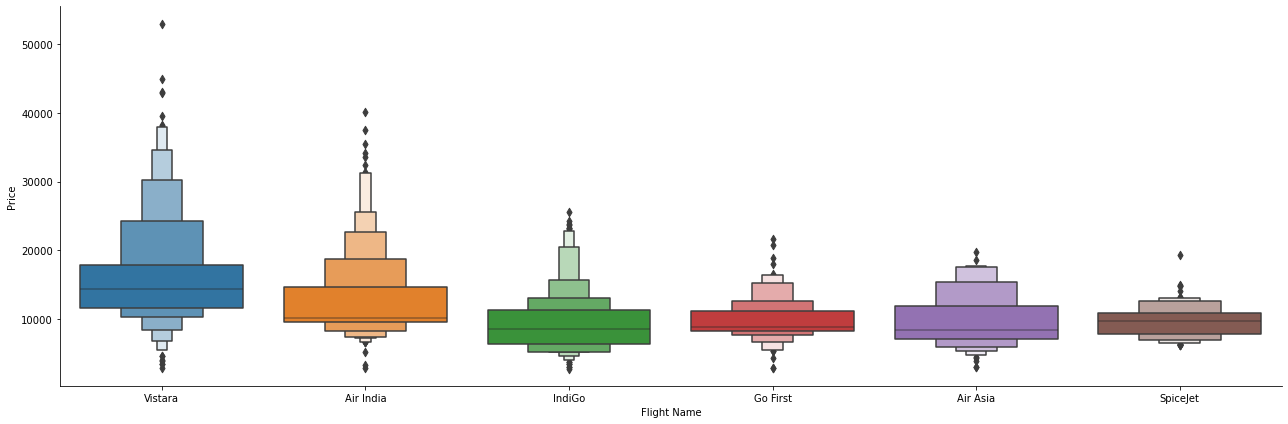

In [71]:
sns.catplot(y = "Price", x = "Flight Name", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

from the graph we can clearly see that Vistara Airline business have the highest price apart from the first and Air india almost all are having similar median.

In [73]:
test_df["Flight Name"].value_counts()

Vistara         98
Air India       82
IndiGo          52
Go First        14
SpiceJet        12
Air Asia         9
Alliance Air     2
Name: Flight Name, dtype: int64

In [74]:
train_df['Price']

0        4363
1        4913
2        5509
3        6187
4        6272
        ...  
1659    16907
1660    17640
1661    17640
1662    17694
1663    17957
Name: Price, Length: 1664, dtype: int64

In [72]:
 #As Flight Name is Nominal Categorical data we will perform OneHotEncoding

Airline = train_df[["Flight Name"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Flight Name_Air India,Flight Name_Go First,Flight Name_IndiGo,Flight Name_SpiceJet,Flight Name_Vistara
0,0,0,1,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,0,1,0,0


In [75]:
 #As Flight Name is Nominal Categorical data we will perform OneHotEncoding

Airline = test_df[["Flight Name"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Flight Name_Air India,Flight Name_Alliance Air,Flight Name_Go First,Flight Name_IndiGo,Flight Name_SpiceJet,Flight Name_Vistara
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [77]:
train_df["Source Station"].value_counts()

New Delhi    956
Bangalore    544
Kolkata       88
Chennai       76
Name: Source Station, dtype: int64

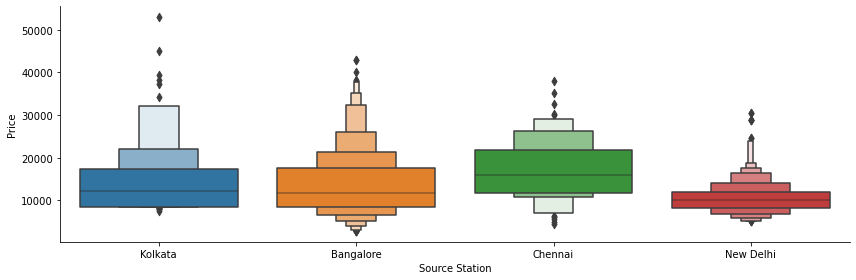

In [78]:
#Source Station vs Price

sns.catplot(y = "Price", x = "Source Station", data = train_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [80]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_df[["Source Station"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source Station_Chennai,Source Station_Kolkata,Source Station_New Delhi
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [84]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = test_df[["Source Station"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source Station_Mumbai,Source Station_New Delhi
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [82]:
train_df["Destination Station"].value_counts()

Bangalore    668
Goa          452
New Delhi    320
Mumbai       134
Pune          90
Name: Destination Station, dtype: int64

In [83]:
# As Destination station is Nominal Categorical data we will perform OneHotEncoding

Destination = train_df[["Destination Station"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination Station_Goa,Destination Station_Mumbai,Destination Station_New Delhi,Destination Station_Pune
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [85]:
# As Destination station is Nominal Categorical data we will perform OneHotEncoding

Destination = test_df[["Destination Station"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination Station_Goa
0,0
1,0
2,0
3,0
4,0


In [88]:
train_df["Total Stop"].value_counts()

1 Stop       1379
Non Stop      163
2 Stop(s)     120
3 Stop(s)       2
Name: Total Stop, dtype: int64

In [91]:
train_df.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2, "3 Stop(s)": 3}, inplace = True)

In [93]:
test_df["Total Stop"].value_counts()

1 Stop       159
2 Stop(s)     60
Non Stop      49
3 Stop(s)      1
Name: Total Stop, dtype: int64

In [94]:
test_df.replace({"Non Stop": 0, "1 Stop": 1, "2 Stop(s)": 2, "3 Stop(s)": 3}, inplace = True)

In [92]:
train_df

,Flight Name,Source Station,Destination Station,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins
0,IndiGo,Chennai,Goa,0,4363,12,1,18,20,1,35,7,15
1,Air Asia,Chennai,Goa,0,4913,13,1,22,15,5,25,7,10
2,Air Asia,Chennai,Goa,1,5509,14,1,22,15,6,45,8,30
3,IndiGo,Chennai,Goa,1,6187,15,1,18,10,23,5,4,55
4,IndiGo,Chennai,Goa,1,6272,16,1,16,40,23,5,6,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,Vistara,New Delhi,Bangalore,1,16907,29,7,14,20,19,15,4,55
1660,Air Asia,New Delhi,Bangalore,1,17640,30,7,15,5,21,55,6,50
1661,Air Asia,New Delhi,Bangalore,1,17640,31,7,4,55,13,30,8,35
1662,Vistara,New Delhi,Bangalore,1,17694,1,8,8,20,17,35,9,15


In [132]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Total Stop                1664 non-null   int64  
 1   Price                     1664 non-null   int64  
 2   Journey day               1664 non-null   int64  
 3   Months                    1664 non-null   int64  
 4   Depature hour             1664 non-null   int64  
 5   Depature Minute           1664 non-null   int64  
 6   Arrival Hour              1664 non-null   int64  
 7   Arrival Minute            1664 non-null   int64  
 8   Duration Hours            1664 non-null   int64  
 9   Duration Mins             1664 non-null   int64  
 10  Flight Name_Air India     1664 non-null   float64
 11  Flight Name_Alliance Air  269 non-null    float64
 12  Flight Name_Go First      1664 non-null   float64
 13  Flight Name_IndiGo        1664 non-null   float64
 14  Flight N

In [120]:
data_train['Flight Name_Air India']=data_train['Flight Name_Air India'].fillna(data_train['Flight Name_Air India'].mode()[0])

In [125]:
data_train['Flight Name_Go First']=data_train['Flight Name_Go First'].fillna(data_train['Flight Name_Go First'].mode()[0])

In [126]:
data_train['Flight Name_IndiGo']=data_train['Flight Name_IndiGo'].fillna(data_train['Flight Name_IndiGo'].mode()[0])

In [127]:
data_train['Flight Name_SpiceJet']=data_train['Flight Name_SpiceJet'].fillna(data_train['Flight Name_SpiceJet'].mode()[0])

In [128]:
data_train['Flight Name_Vistara']=data_train['Flight Name_Vistara'].fillna(data_train['Flight Name_Vistara'].mode()[0])

In [129]:
data_train['Source Station_Mumbai']=data_train['Source Station_Mumbai'].fillna(data_train['Source Station_Mumbai'].mode()[0])

In [130]:
data_train['Source Station_New Delhi']=data_train['Source Station_New Delhi'].fillna(data_train['Source Station_New Delhi'].mode()[0])

In [131]:
data_train['Destination Station_Goa']=data_train['Destination Station_Goa'].fillna(data_train['Destination Station_Goa'].mode()[0])

In [133]:
data_train['Flight Name_Alliance Air']=data_train['Flight Name_Alliance Air'].fillna(data_train['Flight Name_Alliance Air'].mode()[0])

In [96]:
test_df

,Flight Name,Source Station,Destination Station,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival hour,Arrival Minute,Duration Hours,Duration Mins
0,Go First,New Delhi,Ahmedabad,0,"2,591",29,1,5,0,6,35,1,35
1,IndiGo,New Delhi,Ahmedabad,0,"2,973",29,1,5,0,6,35,1,35
2,IndiGo,New Delhi,Ahmedabad,0,"3,351",29,1,6,20,8,5,1,45
3,IndiGo,New Delhi,Ahmedabad,0,"3,452",29,1,20,20,21,55,1,35
4,Go First,New Delhi,Ahmedabad,0,"3,752",29,1,22,0,23,35,1,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,Vistara,Mumbai,Goa,1,"15,792",29,1,14,40,21,20,6,40
265,Air India,Mumbai,Goa,2,"16,320",29,1,11,15,0,40,13,25
266,Air India,Mumbai,Goa,2,"16,320",29,1,11,15,13,25,26,10
267,Vistara,Mumbai,Goa,2,"19,047",29,1,10,30,21,20,10,50


In [98]:
#Concatenating dataFrame on Training Data
data_train = pd.concat([train_df, Airline, Source, Destination], axis = 1)

In [135]:
data_train

,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins,Flight Name_Air India,Flight Name_Alliance Air,Flight Name_Go First,Flight Name_IndiGo,Flight Name_SpiceJet,Flight Name_Vistara,Source Station_Mumbai,Source Station_New Delhi,Destination Station_Goa
0,0,4363,12,1,18,20,1,35,7,15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,4913,13,1,22,15,5,25,7,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,5509,14,1,22,15,6,45,8,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6187,15,1,18,10,23,5,4,55,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,6272,16,1,16,40,23,5,6,25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1659,1,16907,29,7,14,20,19,15,4,55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1660,1,17640,30,7,15,5,21,55,6,50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1661,1,17640,31,7,4,55,13,30,8,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1662,1,17694,1,8,8,20,17,35,9,15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1664 entries, 0 to 1663
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Total Stop                1664 non-null   int64
 1   Price                     1664 non-null   int64
 2   Journey day               1664 non-null   int64
 3   Months                    1664 non-null   int64
 4   Depature hour             1664 non-null   int64
 5   Depature Minute           1664 non-null   int64
 6   Arrival Hour              1664 non-null   int64
 7   Arrival Minute            1664 non-null   int64
 8   Duration Hours            1664 non-null   int64
 9   Duration Mins             1664 non-null   int64
 10  Flight Name_Air India     1664 non-null   int64
 11  Flight Name_Alliance Air  1664 non-null   int64
 12  Flight Name_Go First      1664 non-null   int64
 13  Flight Name_IndiGo        1664 non-null   int64
 14  Flight Name_SpiceJet      1664 non-null 

In [136]:
data_train['Flight Name_Air India']=data_train['Flight Name_Air India'].astype(np.int64)

In [138]:
data_train['Flight Name_Alliance Air']=data_train['Flight Name_Alliance Air'].astype(np.int64)

In [139]:
data_train['Flight Name_Go First']=data_train['Flight Name_Go First'].astype(np.int64)

In [140]:
data_train['Flight Name_IndiGo']=data_train['Flight Name_IndiGo'].astype(np.int64)

In [141]:
data_train['Flight Name_SpiceJet']=data_train['Flight Name_SpiceJet'].astype(np.int64)

In [142]:
data_train['Flight Name_Vistara']=data_train['Flight Name_Vistara'].astype(np.int64)

In [143]:
data_train['Source Station_Mumbai']=data_train['Source Station_Mumbai'].astype(np.int64)

In [144]:
data_train['Source Station_New Delhi']=data_train['Source Station_New Delhi'].astype(np.int64)

In [145]:
data_train['Destination Station_Goa']=data_train['Destination Station_Goa'].astype(np.int64)

In [101]:
#concatenation dataframe on Testing Data
data_test=pd.concat([test_df, Airline, Source, Destination], axis = 1)

In [102]:
data_test.head()

,Flight Name,Source Station,Destination Station,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival hour,...,Duration Mins,Flight Name_Air India,Flight Name_Alliance Air,Flight Name_Go First,Flight Name_IndiGo,Flight Name_SpiceJet,Flight Name_Vistara,Source Station_Mumbai,Source Station_New Delhi,Destination Station_Goa
0,Go First,New Delhi,Ahmedabad,0,"2,591",29,1,5,0,6,...,35,0,0,1,0,0,0,0,1,0
1,IndiGo,New Delhi,Ahmedabad,0,"2,973",29,1,5,0,6,...,35,0,0,0,1,0,0,0,1,0
2,IndiGo,New Delhi,Ahmedabad,0,"3,351",29,1,6,20,8,...,45,0,0,0,1,0,0,0,1,0
3,IndiGo,New Delhi,Ahmedabad,0,"3,452",29,1,20,20,21,...,35,0,0,0,1,0,0,0,1,0
4,Go First,New Delhi,Ahmedabad,0,"3,752",29,1,22,0,23,...,35,0,0,1,0,0,0,0,1,0


In [103]:
data_train.drop(["Flight Name", "Source Station", "Destination Station"], axis=1, inplace=True)

In [105]:
data_train.head()

,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins,Flight Name_Air India,Flight Name_Alliance Air,Flight Name_Go First,Flight Name_IndiGo,Flight Name_SpiceJet,Flight Name_Vistara,Source Station_Mumbai,Source Station_New Delhi,Destination Station_Goa
0,0,4363,12,1,18,20,1,35,7,15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,4913,13,1,22,15,5,25,7,10,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,5509,14,1,22,15,6,45,8,30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1,6187,15,1,18,10,23,5,4,55,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,6272,16,1,16,40,23,5,6,25,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [106]:
data_test.drop(["Flight Name", "Source Station", "Destination Station"], axis=1, inplace=True)

In [107]:
data_test.head()

,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival hour,Arrival Minute,Duration Hours,Duration Mins,Flight Name_Air India,Flight Name_Alliance Air,Flight Name_Go First,Flight Name_IndiGo,Flight Name_SpiceJet,Flight Name_Vistara,Source Station_Mumbai,Source Station_New Delhi,Destination Station_Goa
0,0,"2,591",29,1,5,0,6,35,1,35,0,0,1,0,0,0,0,1,0
1,0,"2,973",29,1,5,0,6,35,1,35,0,0,0,1,0,0,0,1,0
2,0,"3,351",29,1,6,20,8,5,1,45,0,0,0,1,0,0,0,1,0
3,0,"3,452",29,1,20,20,21,55,1,35,0,0,0,1,0,0,0,1,0
4,0,"3,752",29,1,22,0,23,35,1,35,0,0,1,0,0,0,0,1,0


**Feature Selection**

In [118]:
data_train.shape

(1664, 19)

In [109]:
data_train.columns

Index(['Total Stop', 'Price', 'Journey day', 'Months', 'Depature hour',
       'Depature Minute', 'Arrival Hour', 'Arrival Minute', 'Duration Hours',
       'Duration Mins', 'Flight Name_Air India', 'Flight Name_Alliance Air',
       'Flight Name_Go First', 'Flight Name_IndiGo', 'Flight Name_SpiceJet',
       'Flight Name_Vistara', 'Source Station_Mumbai',
       'Source Station_New Delhi', 'Destination Station_Goa'],
      dtype='object')

In [148]:
X=data_train.loc[:,['Total Stop', 'Price', 'Journey day', 'Months', 'Depature hour',
       'Depature Minute', 'Arrival Hour', 'Arrival Minute', 'Duration Hours',
       'Duration Mins', 'Flight Name_Air India', 'Flight Name_Alliance Air',
       'Flight Name_Go First', 'Flight Name_IndiGo', 'Flight Name_SpiceJet',
       'Flight Name_Vistara', 'Source Station_Mumbai',
       'Source Station_New Delhi', 'Destination Station_Goa']]
X.head()

,Total Stop,Price,Journey day,Months,Depature hour,Depature Minute,Arrival Hour,Arrival Minute,Duration Hours,Duration Mins,Flight Name_Air India,Flight Name_Alliance Air,Flight Name_Go First,Flight Name_IndiGo,Flight Name_SpiceJet,Flight Name_Vistara,Source Station_Mumbai,Source Station_New Delhi,Destination Station_Goa
0,0,4363,12,1,18,20,1,35,7,15,0,0,1,0,0,0,0,1,0
1,0,4913,13,1,22,15,5,25,7,10,0,0,0,1,0,0,0,1,0
2,1,5509,14,1,22,15,6,45,8,30,0,0,0,1,0,0,0,1,0
3,1,6187,15,1,18,10,23,5,4,55,0,0,0,1,0,0,0,1,0
4,1,6272,16,1,16,40,23,5,6,25,0,0,1,0,0,0,0,1,0


In [149]:
y = data_train.iloc[:, 1]
y.head()

0    4363
1    4913
2    5509
3    6187
4    6272
Name: Price, dtype: int64

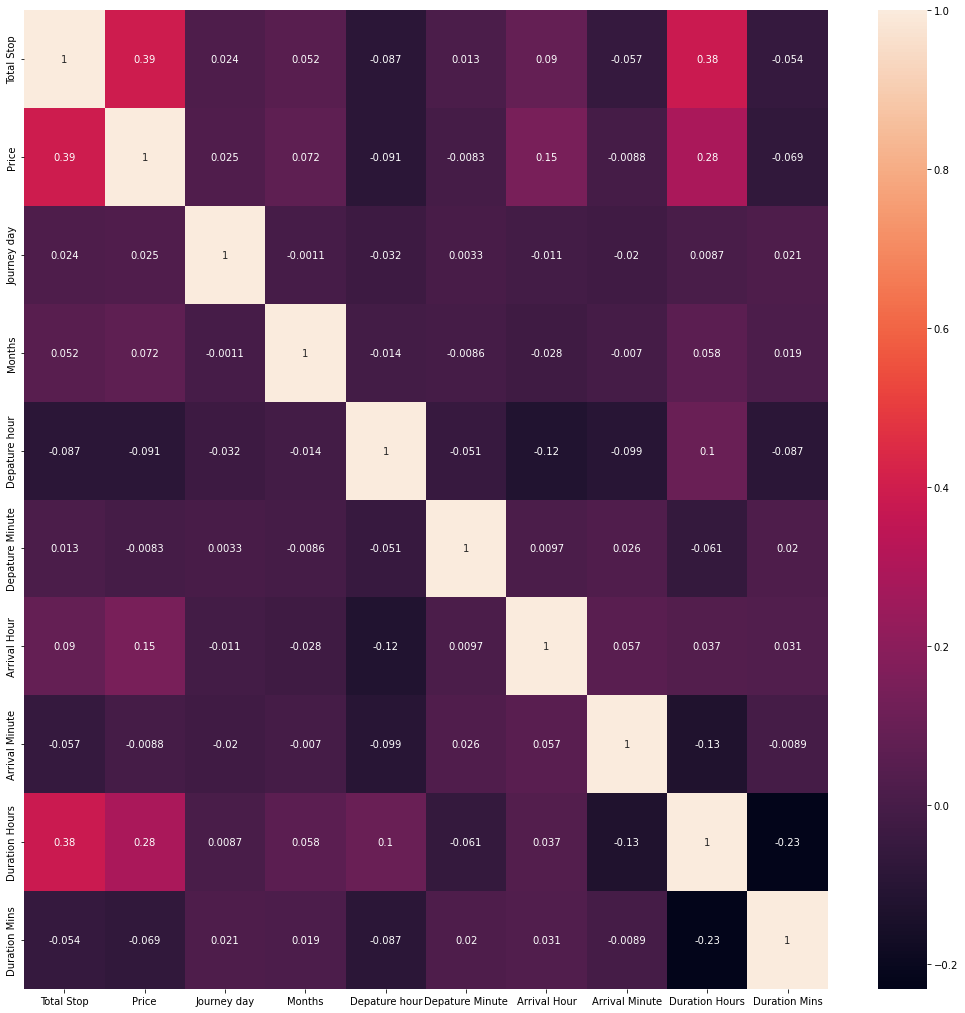

In [114]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_df.corr(), annot = True,)

plt.show()

In [150]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [151]:
print(selection.feature_importances_)

[2.85222137e-02 9.61162211e-01 8.03954780e-04 2.23074776e-03
 1.15806762e-04 1.08178208e-04 6.47774516e-04 1.20097196e-04
 3.18199935e-03 2.76017980e-04 4.67705264e-05 7.13288798e-09
 5.67109847e-07 2.19268901e-06 4.57782371e-07 2.31745416e-04
 5.43624140e-04 2.86306645e-04 1.71932716e-03]


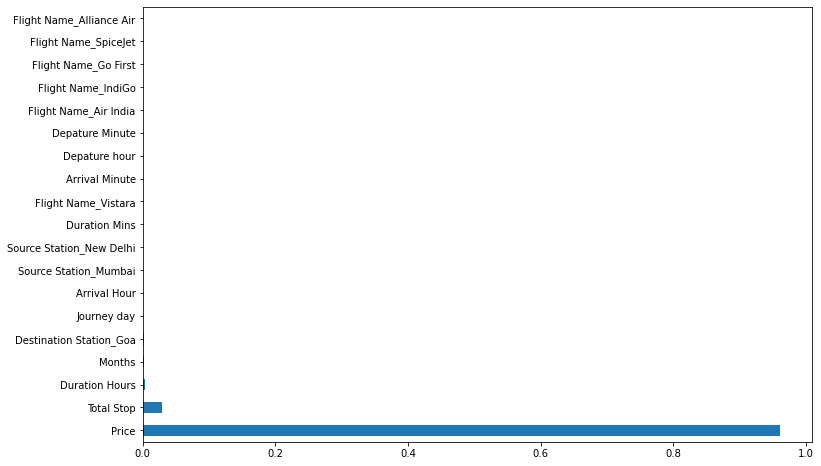

In [152]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**Model Fitting Using Random Forest**

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [154]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [155]:
y_pred = reg_rf.predict(X_test)

In [156]:
reg_rf.score(X_train, y_train)

0.9993719344603912

In [157]:
reg_rf.score(X_test, y_test)

0.9948960217296273

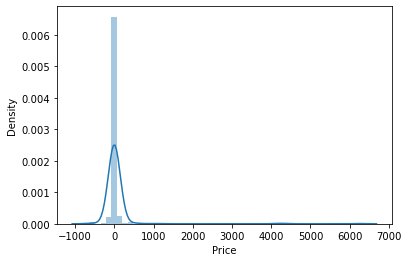

In [158]:
sns.distplot(y_test-y_pred)
plt.show()

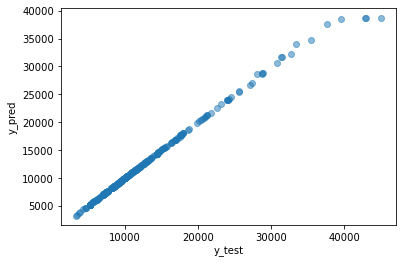

In [159]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [160]:
from sklearn import metrics

In [161]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 70.50348348348352
MSE: 234079.25074834848
RMSE: 483.8173733428229


In [162]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.04163448777184737

In [163]:
metrics.r2_score(y_test, y_pred)

0.9948960217296273

**Hyperparameter Tuning**

In [165]:
from sklearn.model_selection import RandomizedSearchCV

In [166]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [167]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [168]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [169]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [170]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [171]:
prediction = rf_random.predict(X_test)

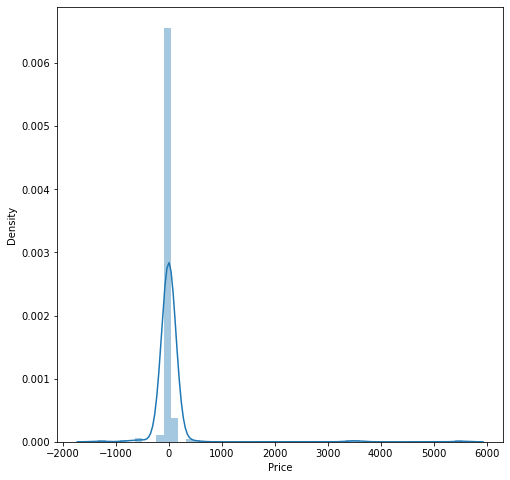

In [172]:
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

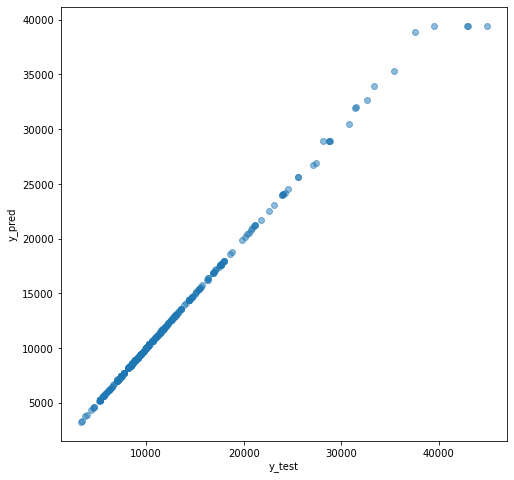

In [173]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [174]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 70.83919915316581
MSE: 178859.52476271006
RMSE: 422.9178699968944
